<img src="https://mir-s3-cdn-cf.behance.net/project_modules/1400/c20f9b101544379.5f21408a955ab.gif">


## *Problem Statement*

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

### *Business Goal*

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 


## *Importing the necessary Libraries*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import polars as po
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

## *Understanding Data*

In [2]:
# Reading the data
data=pd.read_csv('/kaggle/input/bike-sharing/day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Checking the shape
data.shape

(730, 16)

In [4]:
# Checking the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Checking for the nulls in the dataset
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

##### *We can confirm there are no nulls in the dataset*

## *Checking for Duplicates*

In [7]:
# Assigning the same data to new variable
data_copy=data.copy()

In [8]:
# Dropping duplicates
data_copy.drop_duplicates(inplace=True)

In [9]:
#Checking the shape of data after deleting duplicates if any.
data_copy.shape

(730, 16)

#### *we can confirm from here that there are no duplicates in the dataset*

In [10]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [11]:
#Lets drop the unwanted columns from the dataset
#dropping casual and registered because both are included in the target variable cnt.

data.drop(['dteday','instant','casual','registered'],axis=1, inplace =True)


In [12]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### *Changing into Categorical columns*

In [13]:
# Creating dummy variables for mnth,weekday, season,weathersit
#  So lets convert it to category type first

data["mnth"]=data.mnth.astype("category")
data["weekday"]=data.weekday.astype("category")
data["season"]=data.season.astype("category")
data["weathersit"]=data.weathersit.astype("category")

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


##### *we can confirm that the above attributes are converted into category type*

In [15]:
#Mapping the seasons,month, weekday & weathersit column
data.season=data.season.map({1:"Spring",2:"Summer",3:"Fall",4:"Winter"})
data.mnth=data.mnth.map({1:"Jan",2:"Feb",3:"Mar",4:"April",5:"May",6:"June",7:"July",8:"Aug",
                         9:"Sep",10:"Oct",11:"Nov",12:"Dec"})
data.weekday=data.weekday.map({0:"Sun",1:"Mon",2:"Tue",3:"Wed",4:"Thurs",5:"Fri",6:"Sat"})
data.weathersit=data.weathersit.map({1:"Clear",2:"Mist",3:"Light Snow",4:"Rainfall"})

In [16]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600



## *Data Visualisation*

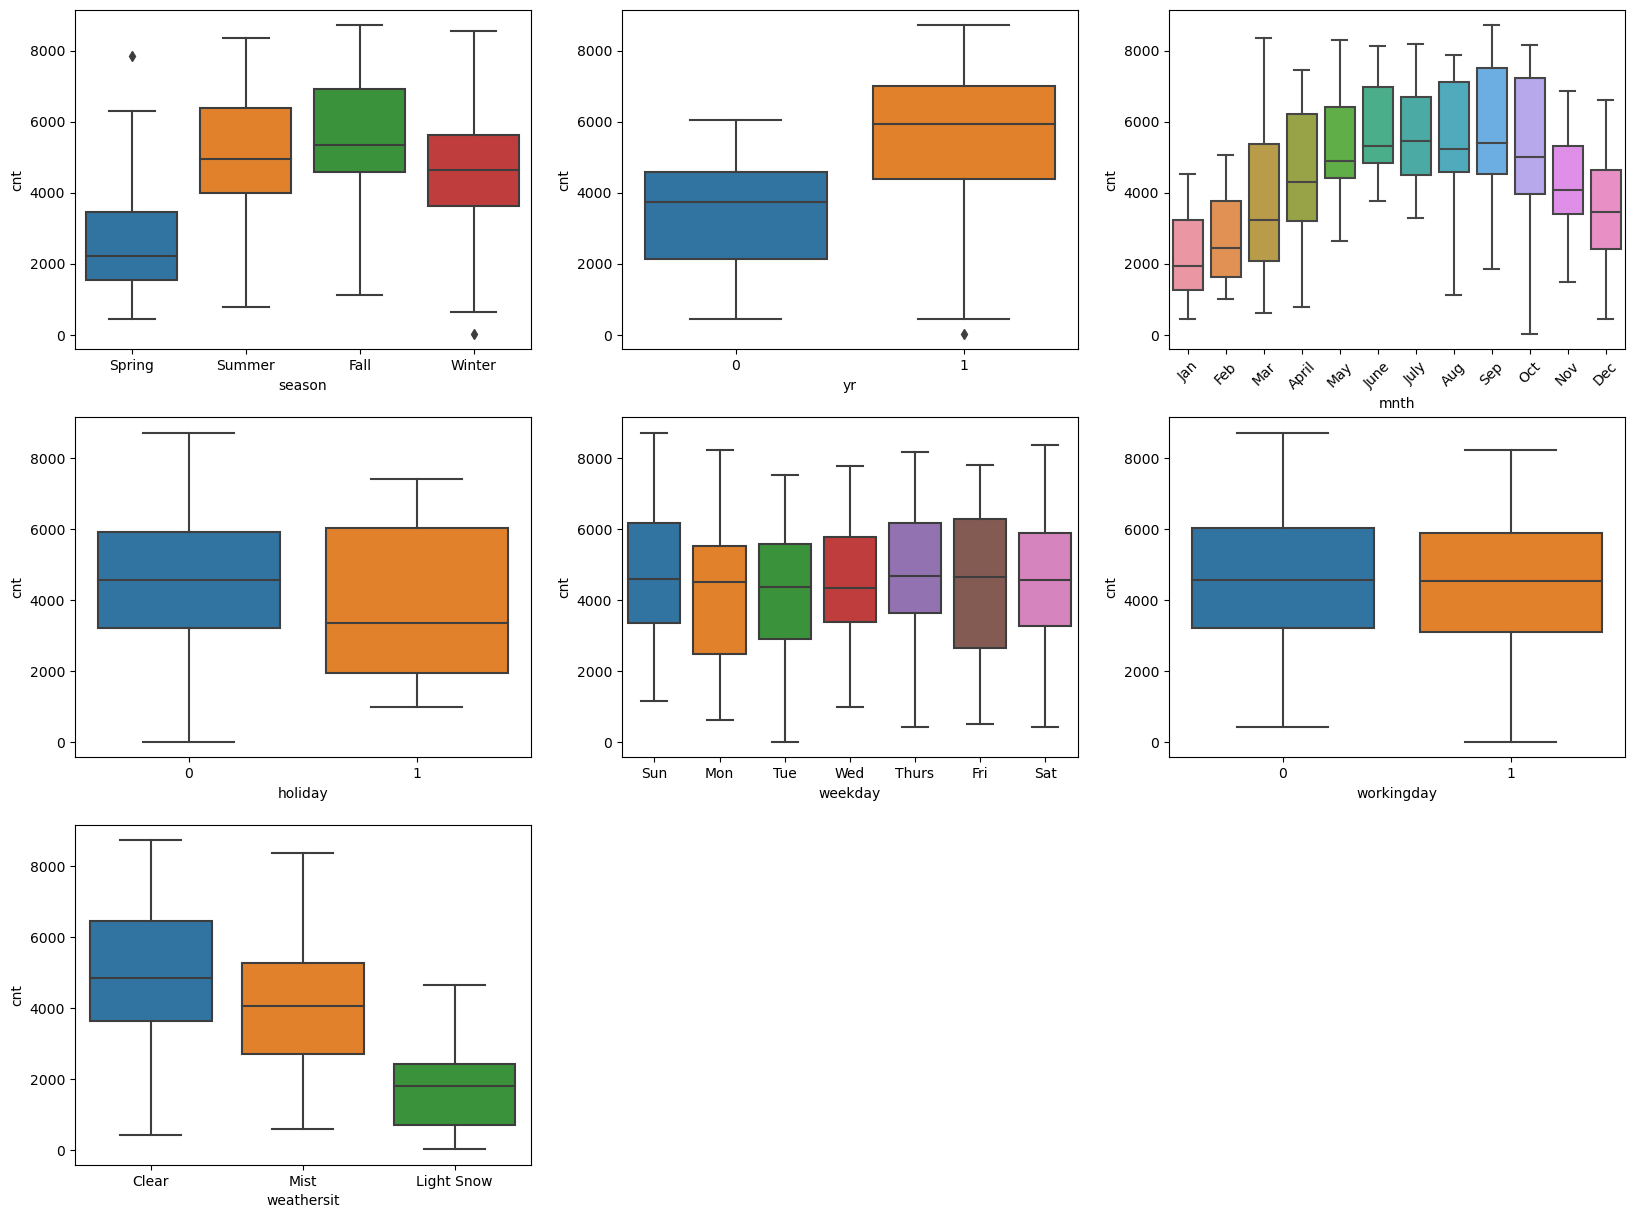

In [17]:
#Plotting the boxplots for all the categorical columns to understand the data better and check the outliers

plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=data)   
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=data)
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=data)
plt.xticks(rotation=45)
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=data)
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=data)
plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=data)
plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=data)
plt.show()

##### *As we can see the seasons Summer and Fall have highest demand for shared bikes*
##### *There is  a gradual increase in shared bikes from year 2018 to 2019*
##### *Demand for shared bikes is highest when the weather situation is clear and very low during Snowy times.*
##### *The demand for shared bikes is high during normal working days than holidays but whereas there is a wide range of demand when its a holiday but with less median count.*

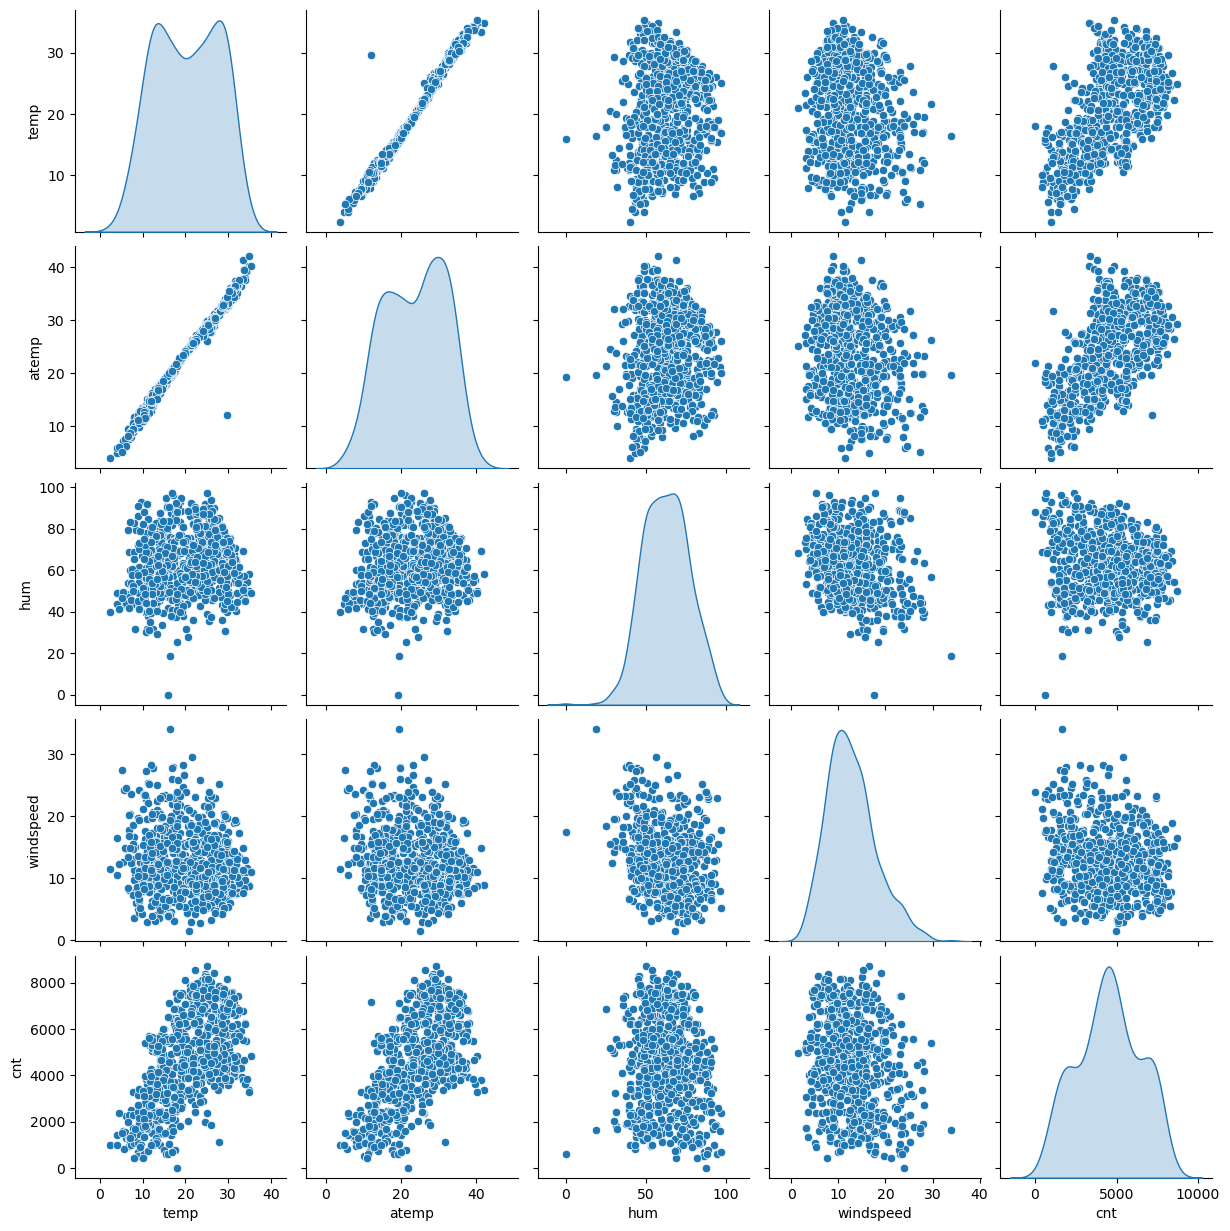

In [18]:
# Visualising the numeric columns
sns.pairplot(data=data,vars=['temp','atemp','hum','windspeed','cnt'],diag_kind='kde')
plt.show()

#### *The pairplot clearly shows there is a strong linear relationship between temp , atemp & cnt*

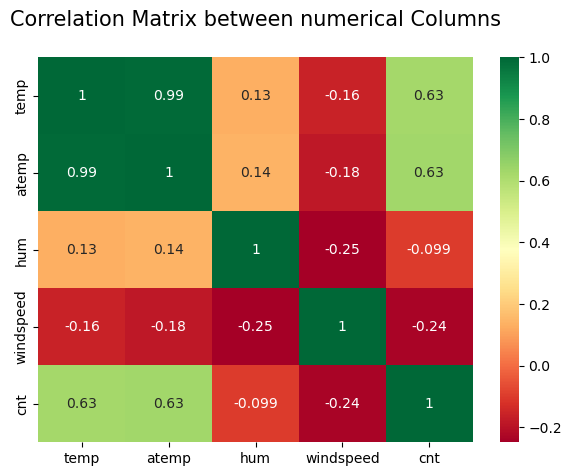

In [19]:
# Finding the Corelation matrix for numerical columns
plt.figure(figsize=(7,5))
sns.heatmap(data[['temp','atemp','hum','windspeed','cnt']].corr(),cmap='RdYlGn',annot=True)
plt.title("Correlation Matrix between numerical Columns\n", fontsize=15)
plt.show()

##### *There is a strong positive linear  correlation between temp and atemp this signifies they are multicollinear in nature which affects the model, so this has to be further checked with VIF*

In [20]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### *Creating Dummy variables*

In [21]:
#Creating dummy variables for categorical variables
season_d=pd.get_dummies(data.season,drop_first=True)
month_d=pd.get_dummies(data.mnth,drop_first=True)
weekday_d=pd.get_dummies(data.weekday,drop_first=True)
weathersit_d=pd.get_dummies(data.weathersit,drop_first=True)

In [22]:
season_d

,Summer,Fall,Winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
725,0,0,0
726,0,0,0
727,0,0,0
728,0,0,0


In [23]:
#Concating the dummy variables to original dataset
data_new=pd.concat([data,season_d,month_d,weekday_d,weathersit_d],axis=1)

In [24]:
pd.set_option('display.max_columns',None)
data_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Summer,Fall,Winter,Feb,Mar,April,May,June,July,Aug,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thurs,Fri,Sat,Mist,Light Snow
0,Spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,Spring,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,Spring,0,Jan,0,Thurs,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [25]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
 12  Summer      730 non-null    uint8   
 13  Fall        730 non-null    uint8   
 14  Winter      730 non-null    uint8   
 15  Feb         730 non-null    uint8   
 16  Mar         730 non-null    uint8   
 17  April       730 non-null    uint8   
 18  May         730 non-null    uint8   
 19  June    

In [26]:
#dropping the columns for which we have already created the dummy variables

data_new.drop(["weekday",'season','mnth','weathersit'],axis=1,inplace=True)


In [27]:
#Confirming that the columns have been dropped
data_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Summer,Fall,Winter,Feb,Mar,April,May,June,July,Aug,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thurs,Fri,Sat,Mist,Light Snow
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [28]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   Summer      730 non-null    uint8  
 9   Fall        730 non-null    uint8  
 10  Winter      730 non-null    uint8  
 11  Feb         730 non-null    uint8  
 12  Mar         730 non-null    uint8  
 13  April       730 non-null    uint8  
 14  May         730 non-null    uint8  
 15  June        730 non-null    uint8  
 16  July        730 non-null    uint8  
 17  Aug         730 non-null    uint8  
 18  Sep         730 non-null    uint8  
 19  Oct         730 non-null    u

## *Splitting the data into Train and Test data*

In [29]:
# Splitting the data into train and test sets in the ratio of 70:30 respectively

data_train,data_test=train_test_split(data_new,train_size=0.7,random_state=50)

In [30]:
#Checking the shape of train data
data_train.shape

(510, 30)

In [31]:
#Checking the shape of test data
data_test.shape

(220, 30)

In [32]:
data_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Summer,Fall,Winter,Feb,Mar,April,May,June,July,Aug,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thurs,Fri,Sat,Mist,Light Snow
172,0,0,1,30.066653,34.69145,70.7500,11.541554,4507,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
14,0,0,1,9.566653,12.40560,49.8750,10.583521,1248,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
204,0,0,1,34.030000,39.74145,55.0833,11.334457,3606,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
182,0,0,1,30.271653,33.36540,44.4583,7.709154,5119,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
708,1,0,1,17.869153,21.77875,92.5000,12.750636,5170,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0


In [33]:
#Rescaling the data using MinMaxSacler
scaler=MinMaxScaler()

#Applying Scaler function to continuous variables
cont=['temp','atemp','hum','windspeed','cnt']
data_train[cont]=scaler.fit_transform(data_train[cont])

In [34]:
data_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Summer,Fall,Winter,Feb,Mar,April,May,June,July,Aug,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thurs,Fri,Sat,Mist,Light Snow
172,0,0,1,0.865247,0.858891,0.729068,0.274549,0.515992,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
14,0,0,1,0.223565,0.236172,0.513954,0.243603,0.141049,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
204,0,0,1,0.989306,1.000000,0.567625,0.267859,0.412333,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
182,0,0,1,0.871664,0.821838,0.458136,0.150755,0.586401,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
708,1,0,1,0.483446,0.498080,0.953198,0.313605,0.592269,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0


In [35]:
data_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Summer,Fall,Winter,Feb,Mar,April,May,June,July,Aug,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thurs,Fri,Sat,Mist,Light Snow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.482353,0.023529,0.698039,0.552655,0.545216,0.644402,0.317884,0.510488,0.254902,0.24902,0.250980,0.076471,0.094118,0.074510,0.100000,0.082353,0.078431,0.088235,0.064706,0.086275,0.088235,0.092157,0.135294,0.149020,0.150980,0.145098,0.137255,0.149020,0.341176,0.031373
std,0.500179,0.151726,0.459559,0.230616,0.223335,0.149118,0.167384,0.223400,0.436234,0.43287,0.434003,0.266010,0.292279,0.262857,0.300295,0.275172,0.269113,0.283915,0.246248,0.281045,0.283915,0.289531,0.342373,0.356457,0.358381,0.352545,0.344454,0.356457,0.474570,0.174494
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343347,0.345522,0.524581,0.197845,0.350523,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.553497,0.556759,0.648347,0.295422,0.517027,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.757231,0.732269,0.752146,0.406471,0.672141,1.000000,0.00000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## *Making a Linear Model*

In [36]:
# Building a Linear model with X and y
y_train=data_train.pop('cnt')
X_train=data_train

In [37]:
lm=LinearRegression()
lm.fit(X_train,y_train)

#Using Recursive Feature Elimination(RFE) for picking top 15 variables

rfe=RFE(estimator=lm,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [38]:
#Display the variables ranking using Rfe

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Summer', True, 1),
 ('Fall', False, 3),
 ('Winter', True, 1),
 ('Feb', False, 12),
 ('Mar', False, 6),
 ('April', False, 9),
 ('May', False, 7),
 ('June', False, 8),
 ('July', False, 11),
 ('Aug', False, 10),
 ('Sep', True, 1),
 ('Oct', False, 5),
 ('Nov', False, 14),
 ('Dec', False, 15),
 ('Mon', True, 1),
 ('Tue', False, 2),
 ('Wed', True, 1),
 ('Thurs', True, 1),
 ('Fri', True, 1),
 ('Sat', False, 13),
 ('Mist', False, 4),
 ('Light Snow', True, 1)]

In [39]:
#Displaying the variables selected using RFE

cols=X_train.columns[rfe.support_]
print(cols)

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'Summer', 'Winter', 'Sep', 'Mon', 'Wed', 'Thurs', 'Fri', 'Light Snow'],
      dtype='object')


In [40]:
# Columns which have been rejected
X_train.columns[~rfe.support_]

Index(['Fall', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug', 'Oct',
       'Nov', 'Dec', 'Tue', 'Sat', 'Mist'],
      dtype='object')

In [41]:
# Calculating VIF
def calcVIF(val):
    vif=pd.DataFrame()
    vif['Features']=val.columns
    vif['VIF']=[variance_inflation_factor(val.values,i) for i in range(val.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF',ascending=False)
    return vif

In [42]:
# Creating a dataframe with RFE selected columns
X_train_rfe=X_train[cols]

In [43]:
X_train_rfe.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Summer,Winter,Sep,Mon,Wed,Thurs,Fri,Light Snow
172,0,0,1,0.865247,0.858891,0.729068,0.274549,0,0,0,0,0,0,1,0
14,0,0,1,0.223565,0.236172,0.513954,0.243603,0,0,0,1,0,0,0,0
204,0,0,1,0.989306,1.000000,0.567625,0.267859,0,0,0,0,0,0,0,0
182,0,0,1,0.871664,0.821838,0.458136,0.150755,0,0,0,1,0,0,0,0
708,1,0,1,0.483446,0.498080,0.953198,0.313605,0,1,0,0,0,0,0,0


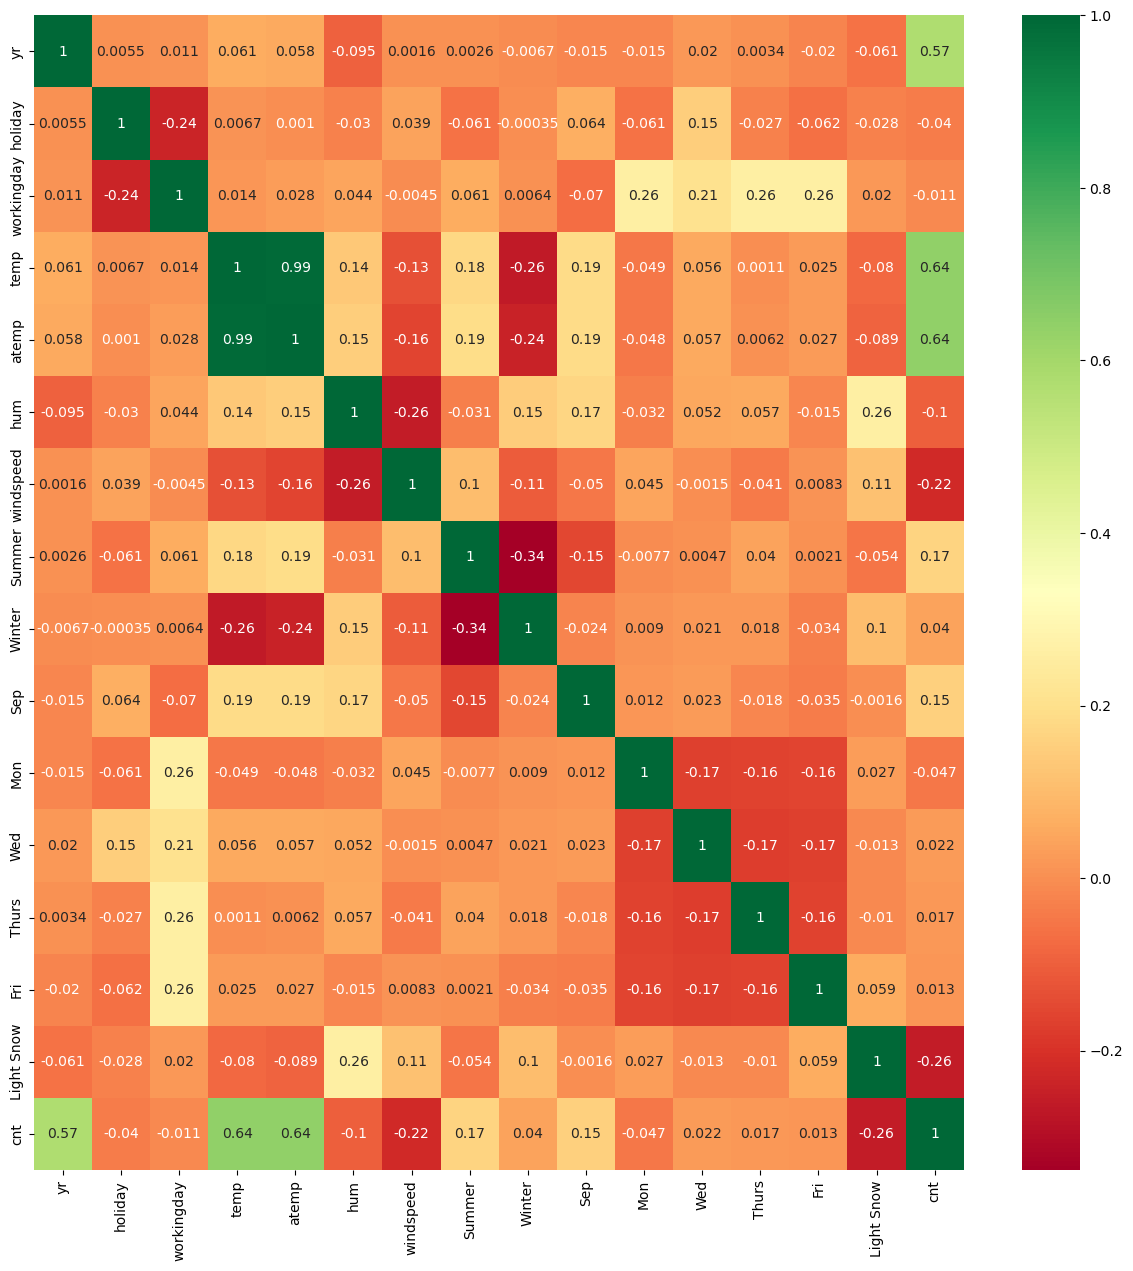

In [44]:
#Lets find the correlation between Rfe selected columns and the target variable
corr_matrix=pd.concat([X_train_rfe,data['cnt']],axis=1)
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [45]:
# Calculating vif for the rfe selected columns
calcVIF(X_train_rfe)

,Features,VIF
4,atemp,370.57
3,temp,356.74
5,hum,10.88
2,workingday,7.16
6,windspeed,3.77
11,Wed,2.00
12,Thurs,1.97
13,Fri,1.94
10,Mon,1.92
0,yr,1.90


#### *As expected temp and atemp have high multi-collinearity*

In [46]:
#Building first linear model
X_train_lm_1=sm.add_constant(X_train_rfe)
lm_1=sm.OLS(y_train,X_train_lm_1).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     178.0
Date:                Thu, 09 Mar 2023   Prob (F-statistic):          4.38e-188
Time:                        17:23:43   Log-Likelihood:                 514.77
No. Observations:                 510   AIC:                            -997.5
Df Residuals:                     494   BIC:                            -929.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2745      0.025     10.780      0.0

#### *As we can see atemp attribute has high p-value & high vif it  is advisable to drop it*

In [47]:
#dropping atemp variable
X_train_new=X_train_rfe.drop(['atemp'],axis=1)

#Checking VIF
calcVIF(X_train_new)

,Features,VIF
4,hum,10.59
3,temp,7.19
2,workingday,7.10
5,windspeed,3.66
10,Wed,2.00
11,Thurs,1.97
12,Fri,1.94
9,Mon,1.92
0,yr,1.90
7,Winter,1.63


#### *We can still see that vif for hum and temp are considerably high*

In [48]:
#Building second model
X_train_lm_2=sm.add_constant(X_train_new)
lm_2=sm.OLS(y_train,X_train_lm_2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     191.0
Date:                Thu, 09 Mar 2023   Prob (F-statistic):          3.56e-189
Time:                        17:23:44   Log-Likelihood:                 514.62
No. Observations:                 510   AIC:                            -999.2
Df Residuals:                     495   BIC:                            -935.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2751      0.025     10.820      0.0

#### *As we can see the vif for humidity is very high so it is better to drop humidity variable*

In [49]:
# Dropping humidity variable
X_train_new=X_train_new.drop(['hum'],axis=1)

#Calculating VIF
calcVIF(X_train_new)

,Features,VIF
2,workingday,6.75
3,temp,4.32
4,windspeed,3.35
9,Wed,2.00
10,Thurs,1.97
11,Fri,1.94
8,Mon,1.92
0,yr,1.88
5,Summer,1.61
6,Winter,1.39


In [50]:
#Building third linear regression model
X_train_lm_3=sm.add_constant(X_train_new)
lm_3=sm.OLS(y_train,X_train_lm_3).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     164.2
Date:                Thu, 09 Mar 2023   Prob (F-statistic):          3.44e-170
Time:                        17:23:44   Log-Likelihood:                 466.70
No. Observations:                 510   AIC:                            -905.4
Df Residuals:                     496   BIC:                            -846.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0794      0.018      4.386      0.0

#### *Since workingday has high vif which is greater than 5 it is advisable to drop*

In [51]:
#Dropping workingday
X_train_new=X_train_new.drop(['workingday'],axis=1)

#Calculate VIF
calcVIF(X_train_new)

,Features,VIF
2,temp,4.05
3,windspeed,3.23
0,yr,1.87
4,Summer,1.61
5,Winter,1.37
8,Wed,1.35
9,Thurs,1.29
10,Fri,1.29
7,Mon,1.28
6,Sep,1.16


In [52]:
#Building Fourth Linear Regression model
X_train_lm_4=sm.add_constant(X_train_new)
lm_4=sm.OLS(y_train,X_train_lm_4).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     175.1
Date:                Thu, 09 Mar 2023   Prob (F-statistic):          9.38e-170
Time:                        17:23:44   Log-Likelihood:                 462.97
No. Observations:                 510   AIC:                            -899.9
Df Residuals:                     497   BIC:                            -844.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0666      0.018      3.786      0.0

#### *It is better to drop 'Thurs' attribute as its p-value is very high*

In [53]:
#Dropping 'Thurs' variable
X_train_new=X_train_new.drop(['Thurs'],axis=1)

#Calc VIF
calcVIF(X_train_new)

,Features,VIF
2,temp,3.88
3,windspeed,3.20
0,yr,1.87
4,Summer,1.60
5,Winter,1.35
8,Wed,1.28
9,Fri,1.23
7,Mon,1.22
6,Sep,1.16
10,Light Snow,1.07


In [54]:
#Building Fifth Linear Regression model
X_train_lm_5=sm.add_constant(X_train_new)
lm_5=sm.OLS(y_train,X_train_lm_5).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     191.4
Date:                Thu, 09 Mar 2023   Prob (F-statistic):          6.72e-171
Time:                        17:23:45   Log-Likelihood:                 462.95
No. Observations:                 510   AIC:                            -901.9
Df Residuals:                     498   BIC:                            -851.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0660      0.017      3.827      0.0

#### *Since the p-value for the Mon variable is very high it implies insignificant so it is advised to drop*

In [55]:
# Dropping 'Mon' as it is having high p-value
X_train_new=X_train_new.drop(['Mon'],axis=1)

#Calculate VIF
calcVIF(X_train_new)

,Features,VIF
2,temp,3.83
3,windspeed,3.12
0,yr,1.87
4,Summer,1.60
5,Winter,1.35
7,Wed,1.24
8,Fri,1.19
6,Sep,1.16
9,Light Snow,1.07
1,holiday,1.06


In [56]:
#Building Sixth Linear Regression Model
X_train_lm_6=sm.add_constant(X_train_new)
lm_6=sm.OLS(y_train,X_train_lm_6).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     210.9
Date:                Thu, 09 Mar 2023   Prob (F-statistic):          4.65e-172
Time:                        17:23:45   Log-Likelihood:                 462.92
No. Observations:                 510   AIC:                            -903.8
Df Residuals:                     499   BIC:                            -857.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0654      0.017      3.834      0.0

#### *As the p-value for Wed is certainly high implying insignificance can be dropped to make the model better*

In [57]:
#Dropping 'wed'
X_train_new=X_train_new.drop(['Wed'],axis=1)

#Calculate VIF
calcVIF(X_train_new)

,Features,VIF
2,temp,3.74
3,windspeed,3.11
0,yr,1.87
4,Summer,1.60
5,Winter,1.34
6,Sep,1.16
7,Fri,1.16
8,Light Snow,1.07
1,holiday,1.04


In [58]:
##Building Seventh Linear Regression Model

X_train_lm_7=sm.add_constant(X_train_new)
lm_7=sm.OLS(y_train,X_train_lm_7).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     234.0
Date:                Thu, 09 Mar 2023   Prob (F-statistic):          5.66e-173
Time:                        17:23:45   Log-Likelihood:                 462.26
No. Observations:                 510   AIC:                            -904.5
Df Residuals:                     500   BIC:                            -862.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0641      0.017      3.766      0.0

#### *OLS regression results shows that the p-value for Fri is higher than the specified 0.05 and shows low collinearity wrt to heatmap so it is better to drop*

In [59]:
#Dropping 'Fri'
X_train_new=X_train_new.drop(['Fri'],axis=1)

#Calculate VIF
calcVIF(X_train_new)

,Features,VIF
2,temp,3.65
3,windspeed,3.09
0,yr,1.87
4,Summer,1.60
5,Winter,1.34
6,Sep,1.16
7,Light Snow,1.07
1,holiday,1.03


In [60]:
##Building Eighth Linear Regression Model

X_train_lm_8=sm.add_constant(X_train_new)
lm_8=sm.OLS(y_train,X_train_lm_8).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     262.5
Date:                Thu, 09 Mar 2023   Prob (F-statistic):          9.59e-174
Time:                        17:23:46   Log-Likelihood:                 461.19
No. Observations:                 510   AIC:                            -904.4
Df Residuals:                     501   BIC:                            -866.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0665      0.017      3.919      0.0

#### *So here we will add a variable Mist to check if the model becomes more significant*

In [61]:
#Concating variable Mist to the train data

X_train_new=pd.concat([X_train_new,X_train['Mist']],axis=1)
calcVIF(X_train_new)

,Features,VIF
2,temp,3.71
3,windspeed,3.16
0,yr,1.87
4,Summer,1.61
8,Mist,1.45
5,Winter,1.36
6,Sep,1.17
7,Light Snow,1.08
1,holiday,1.04


In [62]:
#Building Ninth Linear Regression model
X_train_lm_9=sm.add_constant(X_train_new)
lm_9=sm.OLS(y_train,X_train_lm_9).fit()
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     276.2
Date:                Thu, 09 Mar 2023   Prob (F-statistic):          1.11e-187
Time:                        17:23:46   Log-Likelihood:                 496.90
No. Observations:                 510   AIC:                            -973.8
Df Residuals:                     500   BIC:                            -931.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1081      0.017      6.531      0.0

In [63]:
#Checking the coefficients for the model.
lm_9.params

const         0.108067
yr            0.234515
holiday      -0.071614
temp          0.564971
windspeed    -0.150211
Summer        0.084870
Winter        0.134806
Sep           0.082420
Light Snow   -0.263087
Mist         -0.076336
dtype: float64


#### *It is advisable to consider this as the final model as there is less multicolinearity between the predictors and the p-value seems to be significant*

#### *The difference between the R-Square and Adj.R-Square is also very low which explains all the predictors are not dependent on each other*

### *F-statistic*
#### *Here the F-statistic is 276.2 which is clearly more than 1 which indicates the overall model is significant.*

## *Residual Analysis* 

In [64]:
X_train_lm_9

,const,yr,holiday,temp,windspeed,Summer,Winter,Sep,Light Snow,Mist
172,1.0,0,0,0.865247,0.274549,0,0,0,0,0
14,1.0,0,0,0.223565,0.243603,0,0,0,0,1
204,1.0,0,0,0.989306,0.267859,0,0,0,0,0
182,1.0,0,0,0.871664,0.150755,0,0,0,0,0
708,1.0,1,0,0.483446,0.313605,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
132,1.0,0,0,0.581838,0.290701,1,0,0,0,1
289,1.0,0,0,0.609645,0.281295,0,1,0,0,0
109,1.0,0,0,0.687715,0.425316,1,0,0,0,0
480,1.0,1,0,0.563656,0.283992,1,0,0,0,1


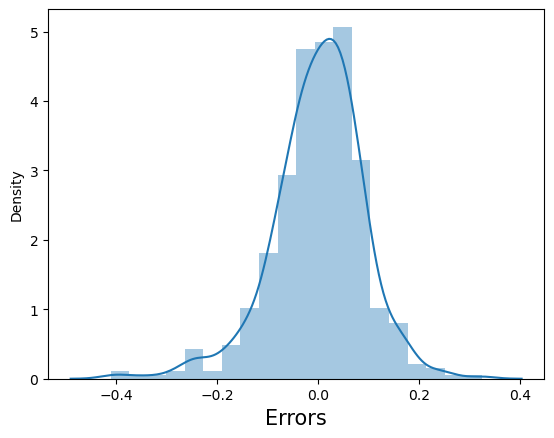

In [65]:
y_train_pred=lm_9.predict(X_train_lm_9)

#Checking Normality for the error terms
import warnings
warnings.filterwarnings("ignore")

sns.distplot((y_train-y_train_pred),bins=20)
plt.xlabel("Errors",fontsize=15)
plt.show()

#### *The error terms are normally distributed around mean Zero*

In [66]:
#Displaying the VIF
calcVIF(X_train_new)

,Features,VIF
2,temp,3.71
3,windspeed,3.16
0,yr,1.87
4,Summer,1.61
8,Mist,1.45
5,Winter,1.36
6,Sep,1.17
7,Light Snow,1.08
1,holiday,1.04


## *Making predictions using the final model*

In [67]:
data_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Summer,Fall,Winter,Feb,Mar,April,May,June,July,Aug,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thurs,Fri,Sat,Mist,Light Snow
333,0,0,1,13.325000,15.56105,61.3333,18.167586,3613,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
203,0,0,1,34.815847,40.21435,50.0000,8.791807,3285,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
279,0,0,0,20.944153,25.22020,68.4167,1.500244,4985,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
483,1,0,1,18.791653,22.50605,58.7083,7.832836,6304,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
267,0,0,1,26.000847,28.63185,84.5000,3.375406,5010,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


#### *Applying scaling on test data*

In [68]:
#Now we need to apply scaling on the test dataset

num_var=['temp','atemp','hum','windspeed','cnt']
data_test[num_var]=scaler.transform(data_test[num_var])
data_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Summer,Fall,Winter,Feb,Mar,April,May,June,July,Aug,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thurs,Fri,Sat,Mist,Light Snow
333,0,0,1,0.341207,0.324343,0.632030,0.488582,0.413139,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
203,0,0,1,1.013904,1.013214,0.515242,0.185727,0.375403,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
279,0,0,0,0.579699,0.594242,0.705024,-0.049804,0.570985,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
483,1,0,1,0.512322,0.518402,0.604980,0.154750,0.722734,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
267,0,0,1,0.737981,0.689572,0.870760,0.010767,0.573861,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [69]:
data_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Summer,Fall,Winter,Feb,Mar,April,May,June,July,Aug,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thurs,Fri,Sat,Mist,Light Snow
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.540909,0.040909,0.672727,0.577486,0.569385,0.652310,0.305077,0.529134,0.245455,0.277273,0.227273,0.077273,0.063636,0.100000,0.050000,0.081818,0.100000,0.077273,0.122727,0.081818,0.068182,0.068182,0.163636,0.131818,0.122727,0.136364,0.154545,0.127273,0.327273,0.022727
std,0.499460,0.198531,0.470288,0.244429,0.237294,0.141169,0.168920,0.221141,0.431338,0.448673,0.420026,0.267633,0.244661,0.300684,0.218442,0.274713,0.300684,0.267633,0.328872,0.274713,0.252632,0.252632,0.370789,0.339064,0.328872,0.343957,0.362295,0.334038,0.470288,0.149373
min,0.000000,0.000000,0.000000,0.049103,0.031559,0.311386,-0.049804,0.089623,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.371060,0.385512,0.551846,0.185059,0.381040,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.588790,0.599537,0.641738,0.283969,0.525311,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.780492,0.761869,0.752576,0.406005,0.705476,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.029946,1.064361,1.002146,0.800818,0.981707,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [70]:
# Assigning the target variable to y and test data to X
y_test=data_test.pop('cnt')
X_test=data_test

In [71]:
#Checking shape 
y_test.shape

(220,)

In [72]:
# CHecking the shape of the df
X_test.shape

(220, 29)

In [73]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 333 to 707
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          220 non-null    int64  
 1   holiday     220 non-null    int64  
 2   workingday  220 non-null    int64  
 3   temp        220 non-null    float64
 4   atemp       220 non-null    float64
 5   hum         220 non-null    float64
 6   windspeed   220 non-null    float64
 7   Summer      220 non-null    uint8  
 8   Fall        220 non-null    uint8  
 9   Winter      220 non-null    uint8  
 10  Feb         220 non-null    uint8  
 11  Mar         220 non-null    uint8  
 12  April       220 non-null    uint8  
 13  May         220 non-null    uint8  
 14  June        220 non-null    uint8  
 15  July        220 non-null    uint8  
 16  Aug         220 non-null    uint8  
 17  Sep         220 non-null    uint8  
 18  Oct         220 non-null    uint8  
 19  Nov         220 non-null   

In [74]:
# So we will only select the variables that are deployed in our final model

cols=X_train_new.columns
X_test=X_test[cols]

In [75]:
X_test.head()

,yr,holiday,temp,windspeed,Summer,Winter,Sep,Light Snow,Mist
333,0,0,0.341207,0.488582,0,1,0,0,0
203,0,0,1.013904,0.185727,0,0,0,0,0
279,0,0,0.579699,-0.049804,0,1,0,0,0
483,1,0,0.512322,0.154750,1,0,0,0,0
267,0,0,0.737981,0.010767,0,1,1,0,1


In [76]:
# We will add constant to the dataframe test

X_test_lm=sm.add_constant(X_test)

In [77]:
# Making y test predictions

y_test_pred=lm_9.predict(X_test_lm)

In [78]:
#Calculating the r2 score

r2=r2_score(y_test,y_test_pred)
r2

0.7858170400398166

In [79]:
#Calculating adjusted r2 score

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7766


## *Model Evaluation*

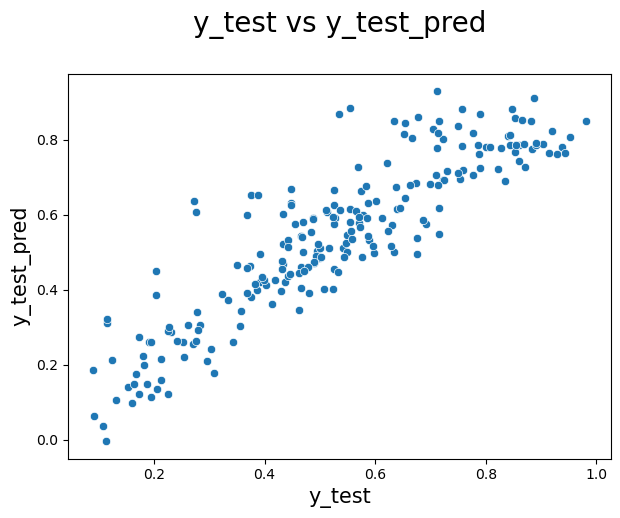

In [80]:
#Lets plot the y_test and y_test_pred to understand the linearity
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test,y=y_test_pred)
plt.title("y_test vs y_test_pred\n",fontsize=20)
plt.xlabel("y_test",fontsize=15)
plt.ylabel("y_test_pred",fontsize=15)
plt.show()

#### *As we can see that the y_test and y_test_pred values are following a linear relationship*

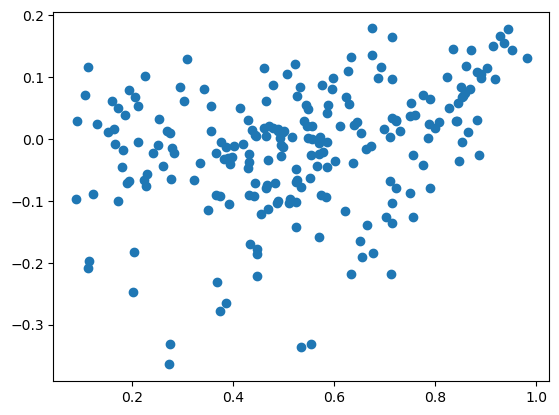

In [81]:
#Checking the residual terms

resi=y_test-y_test_pred
plt.scatter(y_test,resi)
plt.show()

#### *Here we can confirm that the residuals are not following any pattern and are distributed randomly.*

In [82]:
#Checking the coffecients of the final model
lm_9.params

const         0.108067
yr            0.234515
holiday      -0.071614
temp          0.564971
windspeed    -0.150211
Summer        0.084870
Winter        0.134806
Sep           0.082420
Light Snow   -0.263087
Mist         -0.076336
dtype: float64

### *So the equeation of the best  fitted linear model is given as:*
### *cnt  =  0.108067  +  (yr * 0.234515)  -  (holiday * 0.071614)  +  (temp * 0.564971)  -  (windspeed * 0.150211)  +  (summer * 0.084870) + (winter * 0.134806) + (sep * 0.082420) - (light snow * 0.263087) - (mist * 0.076336)*

## *Understanding the coffecients*

- Year      : A coefficent of 0.234515 indicates that a unit increase in year, increases the bike shares by 0.2345 units.
- Holiday   : A coefficent of 0.071614 indicates that a unit increase in holiday, decreases the bike shares by 0.0716 units.
- Temp      : A coefficent of 0.564971 indicates that a unit increase in Temp, increases the bike shares by 0.5649 units.
- Windspeed : A coefficent of 0.150211 indicates that a unit increase in windspeed, decreases the bike shares by 0.1502 units.
- Summer    : A coefficent of 0.084870 indicates that a unit increase in Summer, increases the bike shares by 0.0848 units.
- Winter    : A coefficent of 0.134806 indicates that a unit increase in winter, increases the bike shares by 0.1348 units.
- Sept      : A coefficent of 0.082420 indicates that a unit increase in september, increases the bike shares by 0.0824 units.
- Light Snow: A coefficent of 0.263087 indicates that a unit increase in Light Snow, decreases the bike shares by 0.2630 units.    
- Mist      : A coefficent of 0.076336 indicates that a unit increase in mist, decreases the bike shares by 0.0763 units.

## *Visualising the data*

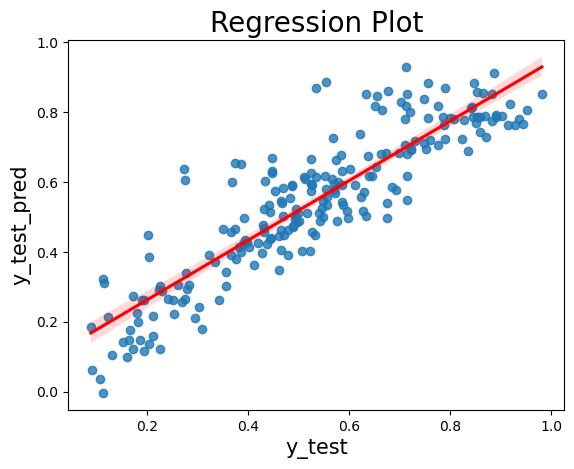

In [83]:
# Plotting a regression plot on the predicted data
sns.regplot(x=y_test,y=y_test_pred, line_kws={'color':'red'})
plt.title("Regression Plot",fontsize=20)
plt.xlabel("y_test",fontsize=15)
plt.ylabel("y_test_pred",fontsize=15)
plt.show()

### *Comparing between train and test Data*

### *-Train data r2       :  0.833*
### *-Train data adj r2 : 0.830*
### *-Test data r2        : 0.785*
### *-Test data adj r2  : 0.776*



## *Final Inferences*

### *The top predictors for our model which are affecting the bike sharing are*
#### *Temperature: A coeff. value of 0.5649, indicates a unit increase in temperature increses the bike shares by 0.5649 units*
#### *Weather Sit.( Light Snow): A coeff. value of (-0.2630), indicates a unit increase in weather situation decreases the bike shares by 0.2630 units*
#### *Year: A coeff. value of  0.2345 , indicates that a unit increase in year variable increases the bike shares  by 0.2345 units*

<h1><center><img src="https://i.pinimg.com/originals/e2/d7/c7/e2d7c71b09ae9041c310cb6b2e2918da.gif"></center></h1>
